In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("spambase/spambase.data")

# Problem 1

## Part A

In [3]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.25)
spam = train[train.columns[-1]].sum()
total = len(train)
spam/total

0.396231884057971

In [4]:
from sklearn.linear_model import LogisticRegression
X = train.drop(train.columns[-1], axis=1)
y = train[train.columns[-1]]
model = LogisticRegression(random_state=0).fit(X, y)

In [5]:
y_true = test[test.columns[-1]]
X_test = test.drop(train.columns[-1], axis=1)
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true, y_pred)

In [6]:
tn, fp, fn, tp = cm.ravel()
print("True Negative:", tn, "False Positives:", fp, "False Negatives:", fn, "True Positives:", tp)

True Negative: 675 False Positives: 30 False Negatives: 44 True Positives: 401


In [7]:
accuracy = model.score(X_test, y_true)
error = 1 - accuracy
print("Accuracy:", accuracy, "Error:", error)

Accuracy: 0.9356521739130435 Error: 0.06434782608695655


In [8]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)
print("Precision:", precision, "Recall:", recall, "F1:", f1)

Precision: 0.9303944315545244 Recall: 0.9011235955056179 F1: 0.9155251141552512


## Part B

In [9]:
model.coef_

array([[-2.55277779e-01, -1.74931936e-01,  1.29060667e-01,
         7.24060385e-01,  5.20339381e-01,  7.72278384e-01,
         2.05783525e+00,  7.33535862e-01,  5.86622842e-01,
         2.17783801e-01, -4.89150092e-02, -2.24350708e-01,
         3.40741185e-02,  8.01733158e-03,  9.72970330e-01,
         8.80156410e-01,  7.39016926e-01,  1.04319109e-01,
         5.52332404e-02,  7.72222456e-01,  2.50674529e-01,
         2.76411680e-01,  2.32896094e+00,  3.62864831e-01,
        -1.80092046e+00, -7.03153269e-01, -3.33529224e+00,
         2.60278086e-01, -1.25790734e+00, -2.86822268e-01,
        -3.34554155e-01,  2.96723476e-02, -8.96378601e-01,
        -5.22364147e-02, -9.88972363e-01,  5.24870336e-01,
         8.81987789e-02, -4.97684931e-01, -6.16561269e-01,
        -1.71511994e-01, -1.23046448e+00, -1.74614394e+00,
        -7.78558557e-01, -1.30746202e+00, -6.31937988e-01,
        -1.64079356e+00, -9.94651270e-01, -1.50156871e+00,
        -1.21099704e+00, -3.81480979e-01, -4.53922215e-0

The columns that have the largest contributions are char_freq_$, word_freq_remove, word_freq_000, word_freq_george. 

## Part C

In [10]:
from sklearn.metrics import accuracy_score
probs = model.predict_proba(X_test)
thresholds = [.1 * x for x in range(1,10)]
accuracy = []
for t in thresholds:
    preds = np.where(model.predict_proba(X_test)[:,1] > t, 1, 0)
    accuracy.append(accuracy_score(y_true, preds))
for i in range(len(thresholds)):
    print("T:", thresholds[i], "Accuracy:", accuracy[i])

T: 0.1 Accuracy: 0.8139130434782609
T: 0.2 Accuracy: 0.8582608695652174
T: 0.30000000000000004 Accuracy: 0.9121739130434783
T: 0.4 Accuracy: 0.9330434782608695
T: 0.5 Accuracy: 0.9356521739130435
T: 0.6000000000000001 Accuracy: 0.9243478260869565
T: 0.7000000000000001 Accuracy: 0.9078260869565218
T: 0.8 Accuracy: 0.88
T: 0.9 Accuracy: 0.8417391304347827


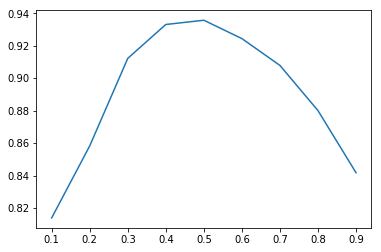

In [12]:
import matplotlib.pyplot as plt
plt.plot(thresholds, accuracy)
plt.show()

# Problem 2

## Part A

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
ks = [i for i in range(2,15)]
accuracy = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    accuracy.append(knn.score(X_test, y_true))
for i in range(len(ks)):
    print("K:", ks[i], "Accuracy:", accuracy[i], "Error:",1-accuracy[i])


K: 2 Accuracy: 0.8104347826086956 Error: 0.18956521739130439
K: 3 Accuracy: 0.8078260869565217 Error: 0.1921739130434783
K: 4 Accuracy: 0.802608695652174 Error: 0.19739130434782604
K: 5 Accuracy: 0.811304347826087 Error: 0.18869565217391304
K: 6 Accuracy: 0.7939130434782609 Error: 0.20608695652173914
K: 7 Accuracy: 0.7869565217391304 Error: 0.21304347826086956
K: 8 Accuracy: 0.7860869565217391 Error: 0.2139130434782609
K: 9 Accuracy: 0.788695652173913 Error: 0.21130434782608698
K: 10 Accuracy: 0.7869565217391304 Error: 0.21304347826086956
K: 11 Accuracy: 0.7843478260869565 Error: 0.21565217391304348
K: 12 Accuracy: 0.7904347826086957 Error: 0.2095652173913043
K: 13 Accuracy: 0.7834782608695652 Error: 0.21652173913043482
K: 14 Accuracy: 0.7817391304347826 Error: 0.2182608695652174


## Part B

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
lda = LinearDiscriminantAnalysis()
decisionTree = DecisionTreeClassifier(random_state=0)
knn.fit(X,y)
lda.fit(X,y)
decisionTree.fit(X,y)
accuracyLR = model.score(X_test, y_true)
accuracyLDA = lda.score(X_test, y_true)
accuracyKnn = knn.score(X_test, y_true)
accuracyDecision = decisionTree.score(X_test, y_true)
print("Logistic Regression Accuracy:",accuracyLR, "LDA Accuracy:", accuracyLDA, "Knn k=3 Accuracy:", accuracyKnn, "Decision Tree Accuracy", accuracyDecision)
print("Logistic Regression Error", 1 - accuracyLR,"LDA Error:", 1 - accuracyLDA, "Knn k=3 Error:", 1 - accuracyKnn, "Decision Tree Error", 1 - accuracyDecision)

Logistic Regression Accuracy: 0.9356521739130435 LDA Accuracy: 0.8904347826086957 Knn k=3 Accuracy: 0.811304347826087 Decision Tree Accuracy 0.9156521739130434
Logistic Regression Error 0.06434782608695655 LDA Error: 0.10956521739130431 Knn k=3 Error: 0.18869565217391304 Decision Tree Error 0.08434782608695657


The model that performs the best is the Logistic Regression model and the worst is Knn. I thought larger values of K would help the error of the model, but the knn only got worse as k increased. K=3 was already the best in terms of accuracy on the test set. Decision Tree was close to Logistic Regression and might be better because of its interpretability. 

## Part C

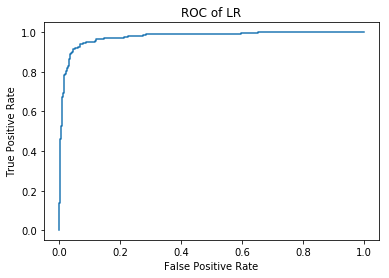

In [15]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_true, model.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LR')
plt.show()

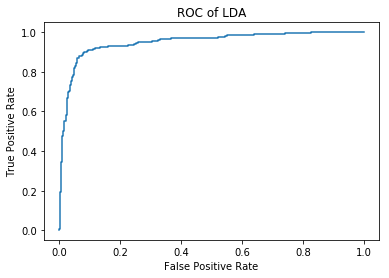

In [16]:
fpr, tpr, _ = roc_curve(y_true, lda.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of LDA')
plt.show()

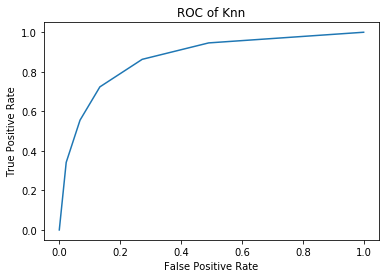

In [17]:
fpr, tpr, _ = roc_curve(y_true, knn.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Knn')
plt.show()

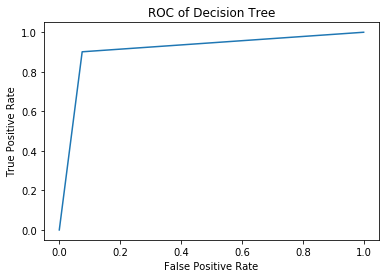

In [18]:
fpr, tpr, _ = roc_curve(y_true, decisionTree.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC of Decision Tree')
plt.show()

In [19]:
from sklearn.metrics import roc_auc_score
LRAuc = roc_auc_score(y_true, model.predict_proba(X_test)[:,1])
LDAAuc = roc_auc_score(y_true, lda.predict_proba(X_test)[:,1])
KnnAuc = roc_auc_score(y_true, knn.predict_proba(X_test)[:,1])
DecisionTreeAuc = roc_auc_score(y_true, decisionTree.predict_proba(X_test)[:,1])
print("LR AUC:", LRAuc, "LDA AUC:", LDAAuc, "Knn AUC:", KnnAuc, "DecisionTree AUC", DecisionTreeAuc)

LR AUC: 0.9759438999123435 LDA AUC: 0.9487194198740935 Knn AUC: 0.8692740457406964 DecisionTree AUC 0.9129731452705394


# Problem 3

## Part A

In [83]:
import math, operator
def euclidean(x, y):
    return np.linalg.norm(x-y)
class knn:
    def __init__(self, k, data):
        self.k = k
        self.data = data
    
    def test(self, x):
        distances = []
        d = self.data
        d["distance"] = d.apply(lambda row: euclidean(row, x), axis=1)
        values = []
        distances = d["distance"].sort_values()
        for i in range(self.k):
            values.append(y[distances.index[i]])
        if sum(values) >= int(self.k/2):
            return 1
        return 0
    def pred(self, test):
        def do(row):
            return self.test(row)
        return test.copy().apply(do, axis=1)
newX= X.copy().head(500)
for k in ks:
    myKnn = knn(k, newX)
    accuracy = accuracy_score(y_true.head(50), myKnn.pred(X_test.head(50)))
    print("K:", k, "Accuracy:", accuracy, "Error:",1-accuracy)

K: 2 Accuracy: 0.34 Error: 0.6599999999999999
K: 3 Accuracy: 0.34 Error: 0.6599999999999999
K: 4 Accuracy: 0.66 Error: 0.33999999999999997
K: 5 Accuracy: 0.66 Error: 0.33999999999999997
K: 6 Accuracy: 0.66 Error: 0.33999999999999997
K: 7 Accuracy: 0.66 Error: 0.33999999999999997
K: 8 Accuracy: 0.66 Error: 0.33999999999999997
K: 9 Accuracy: 0.66 Error: 0.33999999999999997
K: 10 Accuracy: 0.66 Error: 0.33999999999999997
K: 11 Accuracy: 0.66 Error: 0.33999999999999997
K: 12 Accuracy: 0.66 Error: 0.33999999999999997
K: 13 Accuracy: 0.66 Error: 0.33999999999999997
K: 14 Accuracy: 0.66 Error: 0.33999999999999997


My KNN classifier was much slower than the package one so I had trouble running it on larger test data. I tried optimizing it by using more numpy packages, but I still had trouble with timing. It takes about 10-20 seconds to run on 100 data points in the test set and 500 points in the training set. The errors are then widely different because of the reduced sets and the results are different as well. There just is not enough data put in to have reliable results.

# Problem 4

In [104]:
def kfold(k,data, response, model):
    limit = int(len(data)/k)
    sets = []
    rsets = []
    start = 0
    end = limit
    for i in range(k-1):
        sets.append(data.iloc[start:end])
        rsets.append(response.iloc[start:end])
        start = end
        end = end + limit
    sets.append(data.iloc[start:])
    rsets.append(response.iloc[start:])
    verrors = []
    for i in range(k):
        validation_x = sets[i]
        validation_y = rsets[i]
        test = pd.concat(sets[:i] + sets[i+1:])
        y = pd.concat(rsets[:i] + rsets[i+1:])
        model.fit(test, y)
        verrors.append(1 - model.score(validation_x, validation_y))
    return sum(verrors)/k
kfolds = [5,10,20]
for k in kfolds:
    error1 = kfold(k, X, y, LogisticRegression(random_state=0))
    error2 = kfold(k, X, y, LinearDiscriminantAnalysis())
    print("k:",k, "Error of Logistic Regression:", error1, "Error of LDA:", error2)

k: 5 Error of Logistic Regression: 0.07710144927536233 Error of LDA: 0.11826086956521739
k: 10 Error of Logistic Regression: 0.07768115942028986 Error of LDA: 0.11391304347826088
k: 20 Error of Logistic Regression: 0.0762139023766931 Error of LDA: 0.11416751852798364


The model that performed better was logistic regression. The k-fold did make the error drop for each model than in the previous models that were just tested on test data. As K increased the error stayed about the same, but I imagine this is because as k increases test and validation sets get smaller, but there are also more expirements ran. So if one set did had higher error, other sets would probably have lower to balance out.